# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Wahyu Setiawan
- **Email:** wawanslf81@gmail.com
- **ID Dicoding:** wahyu_setiawan22

## Menentukan Pertanyaan Bisnis

- Faktor apa yang memepengaruhi customer menyewa sepeda? 
- Pada jam berapa terjadi permintaan sewa sepeda tertinggi?
- Kapan waktu spesifik untuk konversi customer casual menjadi registered?
- Kapan waktu yang tepat untuk melakukan maintenance harian sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_csv('data/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Load dataset sewa sepeda per jam nya.
- Menampilkan 5 data sewa sepeda teratas

### Assessing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


mencari tahu informasi dari dataset, termasuk Null, tipe data

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


Ringkasan dalam dataset hour sewa sepeda Dicobike

In [5]:
df.duplicated().sum()

0

Melakukan Check data duplikat

**Insight:**
- nama kolom (dteday, yr, mnth, hr, temp, hum, cnt) menjadi (date_day, year, month, hour, temperature, humidity, count_customer) agar mudah dipahami
- tidak ada data null
- tipe data dteday perlu diubah menjadi datetime
- data instant akan dihapus karena index
- value data season, holiday, weekday, workingday, dan weathersit agar tipe data menjadi object.
- value yr diubah 0 = 2011, 1 = 2012
- convert entry temp, atemp, hum, windspeed menjadi data normal (sebelum di normalisasi)
- tidak ada data duplikat

### Table Action Cleaning

| diagnosa data | action |
|---|---|
| nama kolom (dteday, yr, mnth, hr, temp, atemp, hum, cnt) | diubah menjadi (date_day, year, month, hour, temperature, feeling_temperature, humidity, count_customer) |
| dteday | ubah tipe data menjadi datetime |
| data instant | dihapus |
| value season | diubah (1: spring, 2: summer, 3: fall, 4: winter) |
| value holiday | diubah (0: Not a Holiday, 1: Holiday)
| value Weekday | diubah menjadi nama hari |
| value workingday | diubah (0: Off Work, 1: Workingday)
| value weathersit | diubah (1: Clear, 2: Mist, 3: Light Rain/Snow, 4: Extreme Weather)|
| value year | diubah (0: 2011, 1: 2012) |
| value temp, atemp, hum, windspeed | diubah sebelum normalisasi |

### Cleaning Data

In [6]:
df_copy = df.copy()

membuat copy dataset untuk melakukan cleaning, agar tidak perlu mengganti dataset awal jika terjadi kesalahan saat cleaning

#### Rename Column

In [7]:
df_copy.rename(columns={
    'dteday' : 'date_day',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'temp' : 'temperature',
    'atemp' : 'feeling_temperature',
    'hum' : 'humidity',
    'cnt' : 'count_customer'
}, inplace=True)

df_copy.head()

,instant,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**insight:**
- melakukan rename nama kolom agar mudah dipahami
- melakukan rechecking dataset memastikan rename columns sesuai.

#### Cconvert to Datetime

In [8]:
df_copy['date_day'] = pd.to_datetime(df_copy['date_day'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              17379 non-null  int64         
 1   date_day             17379 non-null  datetime64[ns]
 2   season               17379 non-null  int64         
 3   year                 17379 non-null  int64         
 4   month                17379 non-null  int64         
 5   hour                 17379 non-null  int64         
 6   holiday              17379 non-null  int64         
 7   weekday              17379 non-null  int64         
 8   workingday           17379 non-null  int64         
 9   weathersit           17379 non-null  int64         
 10  temperature          17379 non-null  float64       
 11  feeling_temperature  17379 non-null  float64       
 12  humidity             17379 non-null  float64       
 13  windspeed            17379 non-

**insight:**
- melakukan konversi tipe data date_day dari object menjadi datetime.
- melakukan rechecking untuk memastikan proses cleaning sesuai.

#### Drop Columns Instant

In [9]:
df_copy.drop(['instant'], axis=1, inplace=True)
df_copy.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**insight:**
- melakukan penghapusan data instant, karena merupakan **index** dari data hour dan tidak diperlukan dalam analysis
- melakukan rechecking untuk memastikan proses cleaning sesuai

#### Change Entry Data

##### Season

In [10]:
season_mapping = {
    1 : 'Spring',
    2 : 'Summer',
    3 : 'Fall',
    4 : 'Winter'
}

df_copy['season'] = df_copy['season'].map(season_mapping)
df_copy.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**insight:**
- mengganti nilai pada season agar mudah dipahami.
- melakukan rechecking proses cleaning

##### Holiday

In [11]:
df_copy['holiday'].replace({
    0 : 'No',
    1 : 'Yes'
}, inplace=True)

df_copy.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,2011-01-01,Spring,0,1,0,No,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,0,1,1,No,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,0,1,2,No,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,0,1,3,No,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,0,1,4,No,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**insight:**
- mengganti nilai pada holiday agar mudah dipahami
- melakukan rechecking proses cleaning

##### Weekday

In [12]:
weekday_mapping = {
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}

df_copy['weekday'] = df_copy['weekday'].map(weekday_mapping)
df_copy.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,2011-01-01,Spring,0,1,0,No,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,0,1,1,No,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,0,1,2,No,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,0,1,3,No,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,0,1,4,No,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


**insight:**
- mengganti nilai pada weekday agar mudah dipahami.
- melakukan rechecking proses cleaning

##### Workingday

In [13]:
df_copy['workingday'].replace({
    0 : 'No',
    1 : 'Yes'
}, inplace=True)

df_copy.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,2011-01-01,Spring,0,1,0,No,Saturday,No,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,0,1,1,No,Saturday,No,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,0,1,2,No,Saturday,No,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,0,1,3,No,Saturday,No,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,0,1,4,No,Saturday,No,1,0.24,0.2879,0.75,0.0,0,1,1


**insight:**
- mengganti nilai pada workingday agar mudah dipahami.
- melakukan rechecking proses cleaning

##### Weather

In [14]:
weather_mapping = {
    1 : 'Clear',
    2 : 'Mist',
    3 : 'Light Rain/Snow',
    4 : 'Extreme Weather'
}

df_copy['weathersit'] = df_copy['weathersit'].map(weather_mapping)
df_copy.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,2011-01-01,Spring,0,1,0,No,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,0,1,1,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,0,1,2,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,0,1,3,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,0,1,4,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


**insight:**
- mengganti nilai pada weather agar mudah dipahami.
- melakukan rechecking proses cleaning

##### Year

In [15]:
df_copy['year'].replace({
    0 : 2011,
    1 : 2012
}, inplace=True)

df_copy.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,2011-01-01,Spring,2011,1,0,No,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,1,1,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,1,2,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,1,3,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,1,4,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


**insight:**
- mengganti nilai pada year untuk menunjukkan tahun sewa sepeda
- melakukan rechecking proses cleaning

#### Inverse Data Normalization

##### Function Inverse Normalization

In [16]:
def inverse_min_max(df_scaled, x_min, x_max):
  return (df_scaled * (x_max - x_min)) + x_min

def inverse_divide(df_scaled, multipier):
  return df_scaled * multipier

membuat fungsi untuk inverse normalisasi

##### Temperature

In [17]:
df_copy['temperature'] = inverse_min_max(df_copy['temperature'], x_min=-8, x_max=39)
df_copy.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,2011-01-01,Spring,2011,1,0,No,Saturday,No,Clear,3.28,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,1,1,No,Saturday,No,Clear,2.34,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,1,2,No,Saturday,No,Clear,2.34,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,1,3,No,Saturday,No,Clear,3.28,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,1,4,No,Saturday,No,Clear,3.28,0.2879,0.75,0.0,0,1,1


**Insight:**
- Melakukan inverse normalisasi sesuai informasi data di Kaggle
- melakukan rechecking data

##### Feeling Temperature

In [18]:
df_copy['feeling_temperature'] = inverse_min_max(df_copy['feeling_temperature'], x_min=-16, x_max=50)
df_copy.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,2011-01-01,Spring,2011,1,0,No,Saturday,No,Clear,3.28,3.0014,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,1,1,No,Saturday,No,Clear,2.34,1.9982,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,1,2,No,Saturday,No,Clear,2.34,1.9982,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,1,3,No,Saturday,No,Clear,3.28,3.0014,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,1,4,No,Saturday,No,Clear,3.28,3.0014,0.75,0.0,0,1,1


**Insight:**
- Melakukan inverse normalisasi sesuai informasi data di Kaggle
- melakukan rechecking data

##### Humidity

In [19]:
df_copy['humidity'] = inverse_divide(df_copy['humidity'], multipier=100)
df_copy.sample(7)

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
3268,2011-05-21,Summer,2011,5,2,No,Saturday,No,Clear,16.44,17.0000,72.0,0.1045,5,35,40
7495,2011-11-13,Winter,2011,11,22,No,Sunday,No,Clear,14.56,15.0002,41.0,0.3881,25,64,89
4157,2011-06-27,Fall,2011,6,3,No,Monday,Yes,Light Rain/Snow,21.14,22.9994,78.0,0.1343,0,2,2
15574,2012-10-16,Winter,2012,10,3,No,Tuesday,Yes,Clear,11.74,11.9972,67.0,0.1045,0,2,2
5292,2011-08-13,Fall,2011,8,10,No,Saturday,No,Mist,25.84,30.0020,74.0,0.2239,97,163,260
9233,2012-01-25,Spring,2012,1,15,No,Wednesday,Yes,Clear,8.92,9.0008,46.0,0.0000,30,125,155
14460,2012-08-30,Fall,2012,8,17,No,Thursday,Yes,Clear,30.54,32.0018,34.0,0.2239,93,751,844


**Insight:**
- Melakukan inverse normalisasi sesuai informasi data di Kaggle
- melakukan rechecking data

##### Windspeed

In [20]:
df_copy['windspeed'] = inverse_divide(df_copy['windspeed'], multipier=67)
df_copy.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer
0,2011-01-01,Spring,2011,1,0,No,Saturday,No,Clear,3.28,3.0014,81.0,0.0,3,13,16
1,2011-01-01,Spring,2011,1,1,No,Saturday,No,Clear,2.34,1.9982,80.0,0.0,8,32,40
2,2011-01-01,Spring,2011,1,2,No,Saturday,No,Clear,2.34,1.9982,80.0,0.0,5,27,32
3,2011-01-01,Spring,2011,1,3,No,Saturday,No,Clear,3.28,3.0014,75.0,0.0,3,10,13
4,2011-01-01,Spring,2011,1,4,No,Saturday,No,Clear,3.28,3.0014,75.0,0.0,0,1,1


**Insight:**
- Melakukan inverse normalisasi sesuai informasi data di Kaggle
- melakukan rechecking data

## Exploratory Data Analysis (EDA)

### Explore Year

In [21]:
df_byyear = df_copy.groupby(['year']).agg(
    total_customer_casual=('casual', 'sum'),
    total_customer_registered=('registered', 'sum'),
    total_customer=('count_customer', 'sum')
).reset_index()

melakukan groupby berdasarka tahun untuk mendapatkan data customer termasuk casual, subcription, dan total.

In [22]:
df_byyear

,year,total_customer_casual,total_customer_registered,total_customer
0,2011,247252,995851,1243103
1,2012,372765,1676811,2049576


semua segment customer baik casual atau subcription mengalami peningkatan sewa sepeda.

In [23]:
def bar_diff(label, value, title):
  fig, ax = plt.subplots(figsize=(9, 5))
  bars = ax.bar(
      label,
      value
  )

  offset = max(value) * 0.02

  for i in range(1, len(bars)):
    current_val = value[i]
    previous_val = value[i - 1]

    diff = ((current_val - previous_val) / previous_val * 100)

    color = 'green' if diff > 0 else 'red'
    text_label = f'{diff:+.2f}%'

    ax.text(bars[i].get_x() + bars[i].get_width() / 2,
            bars[i].get_height() + offset,
            text_label,
            ha='center',
            va='bottom',
            color=color,
            fontweight='bold',
            fontsize=10)

  ax.set_ylim(0, max(value) * 1.2)
  ax.set_title(title)
  plt.show()

membuat fungsi untuk menampilkan visualisasi bar chart dengan menunjukkan label pertumbuhan customer

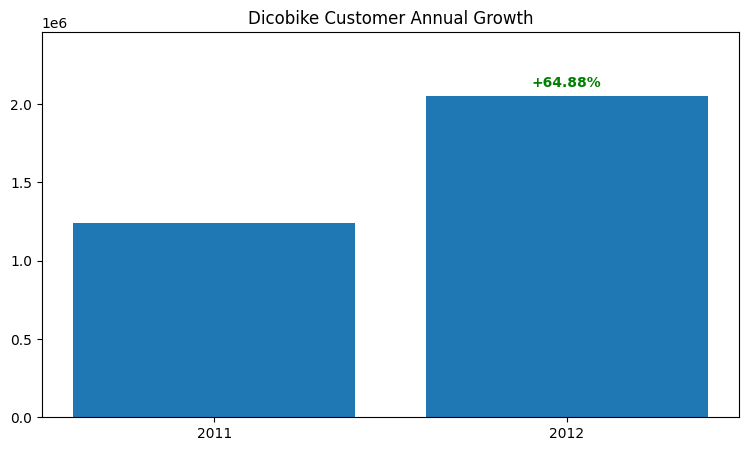

In [24]:
bar_diff(df_byyear['year'].astype(str), df_byyear['total_customer'], title='Dicobike Customer Annual Growth')

**Insight:**
- Data pada 2012 menunjukkan pertumbuhan sewa sepeda yang tinggi sebesar 64.88% dari tahun sebelumnya, ada indikasi tren sewa sepeda meningkat pada tahun 2012.

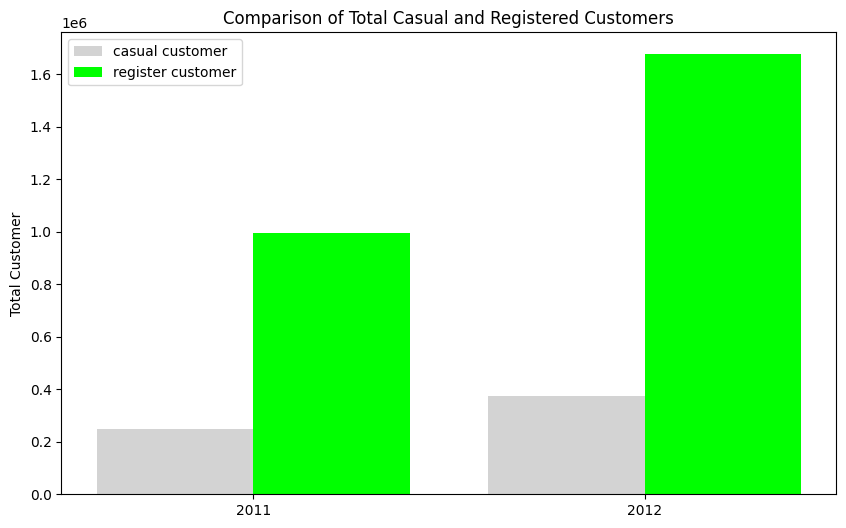

In [25]:
label = df_byyear['year'].astype(str)
value1 = df_byyear['total_customer_casual']
value2 = df_byyear['total_customer_registered']

n = np.arange(len(df_byyear['year'].astype(str)))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(n - width/2, df_byyear['total_customer_casual'], width, label='casual customer', color='lightgray')
bar2 = ax.bar(n + width/2, df_byyear['total_customer_registered'], width, label='register customer', color='lime')

ax.set_ylabel('Total Customer')
ax.set_title('Comparison of Total Casual and Registered Customers')
ax.set_xticks(n)
ax.set_xticklabels(label)
ax.legend()

plt.show()

**Insight:**
- Peningkatan sewa sepeda di 2012 sangat tinggi baik itu untuk segment casual atau subcription

`kita bisa fokuskan menganalisis data 2012 untuk memahami perilaku sewa sepeda customer kita saat ini.`

#### Monthly Trends

In [26]:
df_copy['date_month'] = df_copy['date_day'].dt.to_period('M')
df_copy.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer,date_month
0,2011-01-01,Spring,2011,1,0,No,Saturday,No,Clear,3.28,3.0014,81.0,0.0,3,13,16,2011-01
1,2011-01-01,Spring,2011,1,1,No,Saturday,No,Clear,2.34,1.9982,80.0,0.0,8,32,40,2011-01
2,2011-01-01,Spring,2011,1,2,No,Saturday,No,Clear,2.34,1.9982,80.0,0.0,5,27,32,2011-01
3,2011-01-01,Spring,2011,1,3,No,Saturday,No,Clear,3.28,3.0014,75.0,0.0,3,10,13,2011-01
4,2011-01-01,Spring,2011,1,4,No,Saturday,No,Clear,3.28,3.0014,75.0,0.0,0,1,1,2011-01


membuat data date_month dari data date_day, untuk mencari trends bulanan

In [27]:
df_byyear_month = df_copy.groupby(['date_month']).agg(
    total_customer=('count_customer', 'sum')
).reset_index()

df_byyear_month

,date_month,total_customer
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821
5,2011-06,143512
6,2011-07,141341
7,2011-08,136691
8,2011-09,127418
9,2011-10,123511


Melakukan Groupby berdasarkan tahun dan bulan untuk melihat trends seluruh data sewa sepeda

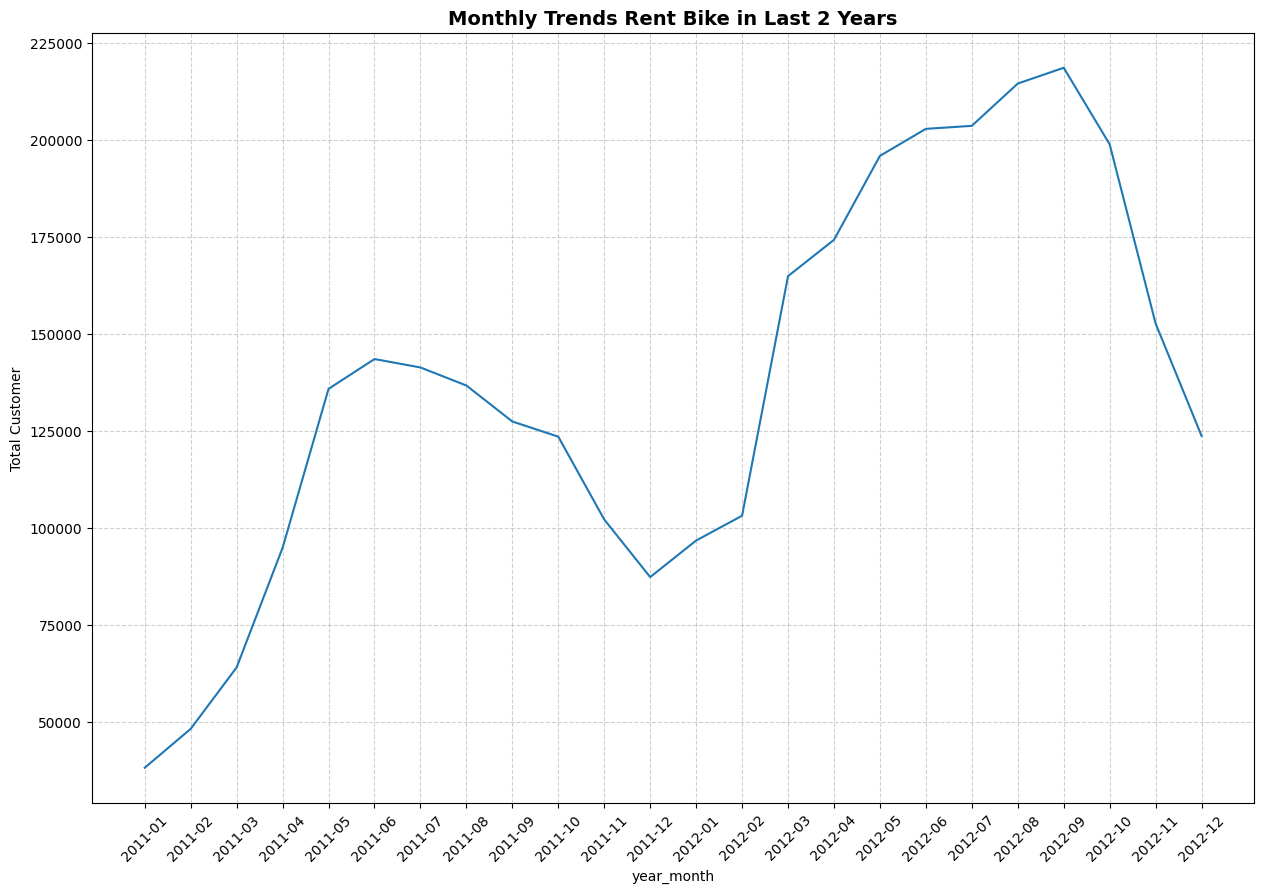

In [28]:
plt.figure(figsize=(15, 10))

sns.lineplot(
    data=df_byyear_month,
    x=df_byyear_month['date_month'].astype(str),
    y='total_customer',
    markers='o'
)

plt.title('Monthly Trends Rent Bike in Last 2 Years', fontsize=14, fontweight='bold')
plt.xlabel('year_month')
plt.xticks(rotation=45)
plt.ylabel('Total Customer')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**insight:**
- secara keseluruhan trends bulanan menunjukkan sewa sepeda terendah berada di Kuartal 1, meskipun menunjukkan peningkatan pada setiap tahunnya.
- Penurunan terjadi di kuartal 2, setelah puncak sewa sepeda pada kuartal 2 dan 3 pada setiap tahunnya. 

### Bike Share in 2012

In [29]:
df_2012 = df_copy[df_copy['year'] == 2012]

Melakukan filter data untuk mendapatkan data hanya di 2012

In [30]:
df_2011 = df_copy[df_copy['year'] == 2011]

#### Season 2012

In [31]:
df_2012_byseason = df_2012.groupby('season').agg(
    total_customer_casual=('casual', 'sum'),
    total_customer_registered=('registered', 'sum'),
    total_customer=('count_customer', 'sum')
).reset_index()

df_2012_byseason

,season,total_customer_casual,total_customer_registered,total_customer
0,Fall,130641,510838,641479
1,Spring,39197,282151,321348
2,Summer,125958,445315,571273
3,Winter,76969,438507,515476


**Insight:**
- sewa sepeda terkecil di 2012 terjadi pada musim semi (Spring). Meskipun terkecil secara trends menunjukkan peningkatan, dengan peningkatan sewa tertinggi di Maret.
- sewa sepeda terbesar di 2012 terjadi di musim gugur (Fall). secara trends bulanan musin ini merupakan puncak sewa sepeda.

#### Comparison with 2011

In [32]:
df_2011_byseason = df_2011.groupby('season').agg(
    total_customer_casual=('casual', 'sum'),
    total_customer_registered=('registered', 'sum'),
    total_customer=('count_customer', 'sum')
).reset_index()

df_2011_byseason

,season,total_customer_casual,total_customer_registered,total_customer
0,Fall,95450,324200,419650
1,Spring,21425,128575,150000
2,Summer,77564,269752,347316
3,Winter,52813,273324,326137


**Insight:**
- secara proporsi setiap musimnya menunjukkan kemiripan denga 2012. terendah di musim semi dan tertinggi musim gugur.
- berdasarkan linechart, secara trends sedikit berbeda peningkatan sewa sepeda tertinggi terjadi di April.


Note: ``ada sedikit perubahan perilaku customer di 2012``

#### Monthly Trends Rent Segment Customer in 2012

In [33]:
df_2012_bymonth = df_2012.groupby('month').agg(
    total_customer_casual=('casual', 'sum'),
    total_customer_registered=('registered', 'sum')
).reset_index()

df_2012_bymonth

,month,total_customer_casual,total_customer_registered
0,1,8969,87775
1,2,8721,94416
2,3,31618,133257
3,4,38456,135768
4,5,44235,151630
5,6,43294,159536
6,7,41705,161902
7,8,43197,171306
8,9,43778,174795
9,10,34538,164303


Melakukan Groupby untuk melihat trends bulanan segment customer di 2012 

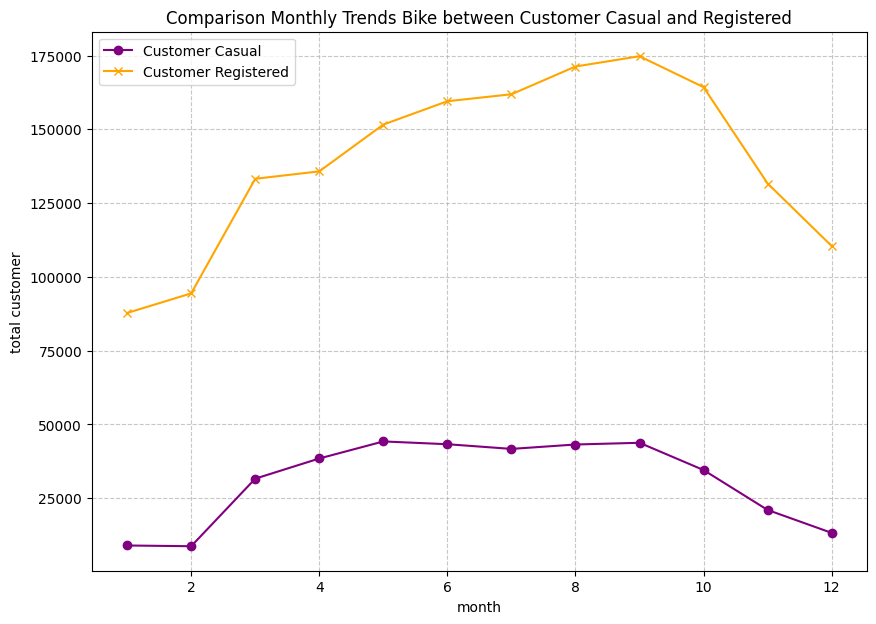

In [34]:
plt.figure(figsize=(10, 7))
plt.plot(
    df_2012_bymonth['month'],
    df_2012_bymonth['total_customer_casual'],
    label='Customer Casual',
    marker='o',
    linestyle='-',
    color='purple'
)

plt.plot(
    df_2012_bymonth['month'],
    df_2012_bymonth['total_customer_registered'],
    label='Customer Registered',
    marker='x',
    linestyle='-',
    color='orange'
)

plt.title('Comparison Monthly Trends Bike between Customer Casual and Registered')
plt.xlabel('month')
plt.ylabel('total customer')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

**Insight:**
- trends bulanan di 2012 menunjukkan peningkatan customer di Musim gugur atau (kuartal 3) dikarenakan peningkatan customer subcription pada musim tersebut.
- trends customer casual di cenderung data di musim panas dan gugur.

#### Weekly Trends Rent Bike segment customer in 2012

In [35]:
df_2012_byweekday = df_2012.groupby('weekday').agg(
    avg_customer_casual=('casual', 'mean'),
    avg_customer_registered=('registered', 'mean')
).reset_index()

df_2012_byweekday

,weekday,avg_customer_casual,avg_customer_registered
0,Friday,39.090545,205.928686
1,Monday,31.530547,189.757235
2,Saturday,75.564904,163.268429
3,Sunday,63.664831,146.369001
4,Thursday,31.316212,218.156501
5,Tuesday,27.501219,207.081235
6,Wednesday,29.421348,214.462279


Melakukan Groupby berdasarkan weekday, untuk melihat trends mingguan segment customer di 2012

In [36]:
sort_weekday = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

df_2012_byweekday['weekday'] = pd.Categorical(df_2012_byweekday['weekday'], categories=sort_weekday, ordered=True)

df_2012_byweekday = df_2012_byweekday.sort_values('weekday')

df_2012_byweekday

,weekday,avg_customer_casual,avg_customer_registered
3,Sunday,63.664831,146.369001
1,Monday,31.530547,189.757235
5,Tuesday,27.501219,207.081235
6,Wednesday,29.421348,214.462279
4,Thursday,31.316212,218.156501
0,Friday,39.090545,205.928686
2,Saturday,75.564904,163.268429


Mengurutkan data weekday agar visualisasi berurutan

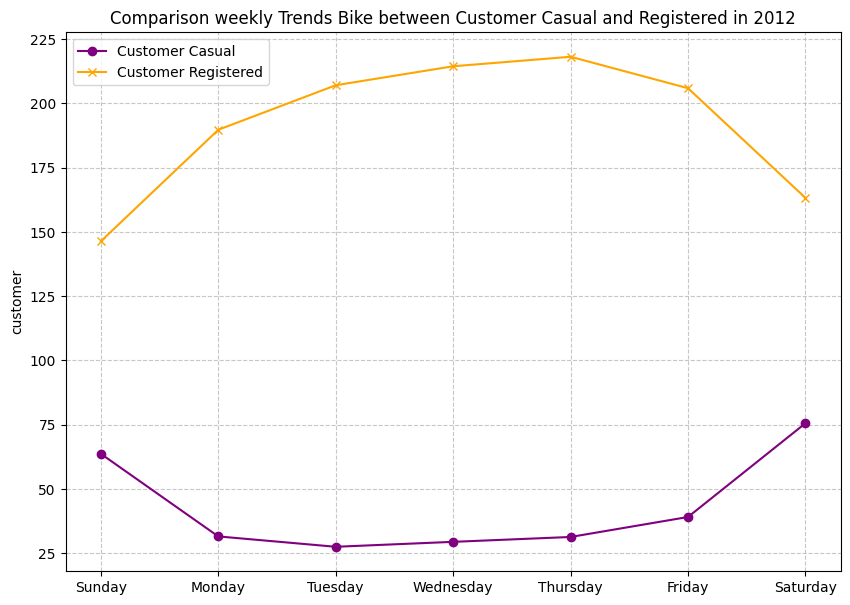

In [37]:
plt.figure(figsize=(10, 7))
plt.plot(
    df_2012_byweekday['weekday'],
    df_2012_byweekday['avg_customer_casual'],
    label='Customer Casual',
    marker='o',
    linestyle='-',
    color='purple'
)

plt.plot(
    df_2012_byweekday['weekday'],
    df_2012_byweekday['avg_customer_registered'],
    label='Customer Registered',
    marker='x',
    linestyle='-',
    color='orange'
)

plt.title('Comparison weekly Trends Bike between Customer Casual and Registered in 2012')
plt.xlabel('')
plt.ylabel('customer')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

**insight:**
- customer subcription menunjukkan penurunan sewa sepeda pada hari sabtu dan minggu, ada kemungkinan karena mereka menggunakan sepeda untuk bekerja
- customer casual menunjukkan peningkatan sewa sepeda pada hari sabtu dan minggu, ada kemungkinan mereka menggunakan sepeda untuk olahraga atau lainnya setelah lelah bekerja.

#### Hourly Trends Rent Bike Customer Segment in 2012

In [38]:
df_2012_byhour = df_2012.groupby('hour').agg(
    avg_customer_casual=('casual', 'mean'),
    avg_customer_registered=('registered', 'mean')
).reset_index()

df_2012_byhour

,hour,avg_customer_casual,avg_customer_registered
0,0,10.827397,53.802740
1,1,7.247253,32.879121
2,2,5.074380,21.622590
3,3,2.645070,10.687324
4,4,1.230556,6.022222
5,5,1.604396,23.406593
6,6,4.505495,89.810440
7,7,11.728022,255.417582
8,8,24.153846,430.609890
9,9,37.346154,237.247253


Melakukan Groupby berdasarkan hourly, untuk melihat trends mingguan segment customer di 2012

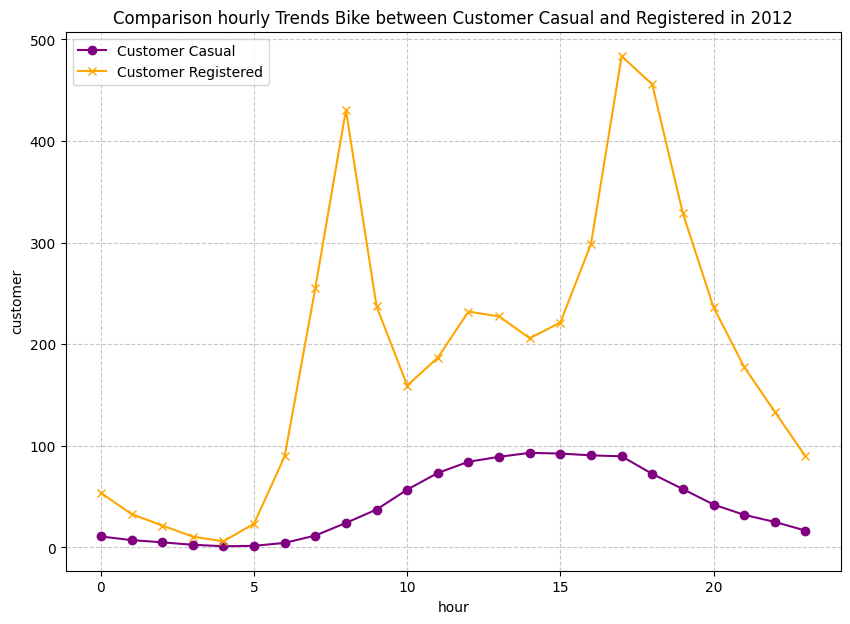

In [39]:
plt.figure(figsize=(10, 7))
plt.plot(
    df_2012_byhour['hour'],
    df_2012_byhour['avg_customer_casual'],
    label='Customer Casual',
    marker='o',
    linestyle='-',
    color='purple'
)

plt.plot(
    df_2012_byhour['hour'],
    df_2012_byhour['avg_customer_registered'],
    label='Customer Registered',
    marker='x',
    linestyle='-',
    color='orange'
)

plt.title('Comparison hourly Trends Bike between Customer Casual and Registered in 2012')
plt.xlabel('hour')
plt.ylabel('customer')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

**Insight:**
- Customer Subcription memiliki peak hour di jam 8 dan 17 - 18. menunjukkan mereka menyewa sepeda untuk pergi dan pulang kerja
- Customer Casual tidak menunjukkan peak hour secara spesifik. sewa tertinggi di siang hari, tetapi cenderung datar. kemungkinan mereka penyewa sepeda secara fleksibel
- waktu terendah sewa sepeda berada di jam 0 - 5. hal ini bisa kita manfaatkan untuk maintenance harian agar sepeda siap di gunakan saat peak hour

#### Comparison holiday and non holiday

In [40]:
df_holiday_2012 = df_2012.groupby('holiday').agg(
    avg_customer_casual=('casual', 'mean'),
    avg_customer_registered=('registered', 'mean')
).reset_index()

df_holiday_2012

,holiday,avg_customer_casual,avg_customer_registered
0,No,42.506078,193.675086
1,Yes,48.318008,137.172414


**Insight:**
- customer subcription tidak berpengaruh terhadap hari libur nasional.
- customer casual cukup berpengaruh terhadap hari libur nasional. ditunjukkan peningkatan sewa sepeda

In [41]:
holiday_pct = (df_holiday_2012['avg_customer_casual'].iloc[1] - df_holiday_2012['avg_customer_casual'].iloc[0]) / df_holiday_2012['avg_customer_casual'].iloc[0] * 100

print(f'percentage diff: {holiday_pct:.2f}%')

percentage diff: 13.67%


insight:
- selama holiday di 2012, customer casual menunjukkan peningkatan transaksi sebesar 13,67%. apakah ini signifikan?

In [42]:
from scipy import stats

holiday_2012 = df_2012[df_2012['holiday'] == 'Yes']['casual']
not_holiday_2012 = df_2012[df_2012['holiday'] == 'No']['casual']

t_stat, p_val = stats.ttest_ind(holiday_2012, not_holiday_2012)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

T-statistic: 1.6235
P-value: 0.1045


**Insight:**
- meskipun secara angka 13,67% tinggi, tetapi secara statistik peningkatan tersebut tidak signifikan, sehingga kurang cocok untuk dijadikan strategi untuk konversi customer casual menjadi subcription

#### Comparison workingday and non workingday

In [43]:
df_workingday_2012 = df_2012.groupby('workingday').agg(
    avg_customer_casual=('casual', 'mean'),
    avg_customer_registered=('registered', 'mean')
).reset_index()

df_workingday_2012

,workingday,avg_customer_casual,avg_customer_registered
0,No,67.566187,153.092086
1,Yes,31.059960,210.146960


**Insight:**
- secara pola cukup mirip dengan holiday, dimana customer casual terpengaruh untuk menyewa sepeda saat Off Work. dan customer subcription tidak terpengaruh untuk menyewa sepeda saat Off Work.
- peningkatan persentase customer casual mencapai 100%

In [44]:
workingday_2012 = df_2012[df_2012['workingday'] == 'Yes']['casual']
offwork_2012 = df_2012[df_2012['workingday'] == 'No']['casual']

t_stat, p_val = stats.ttest_ind(workingday_2012, offwork_2012)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

T-statistic: -29.2267
P-value: 0.0000


**insight:**
- Secara statistik peningkatan saat Off Work untuk customer casual signifikan. ditandai dengan p_value < 5%. kita bisa manfaatkan waktu Off Work untuk menawarkan program subcription.

## Visualization & Explanatory Analysis

### Pertanyaan 2: - Pada jam berapa terjadi permintaan sewa sepeda tertinggi?
### Pertanyaan 4: - Kapan waktu yang tepat untuk melakukan maintenance harian sepeda?

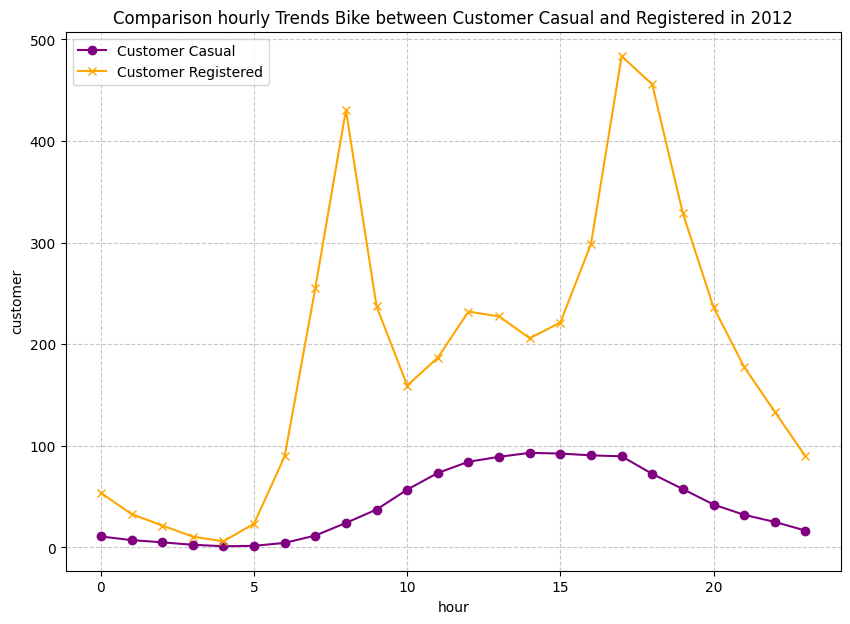

In [45]:
plt.figure(figsize=(10, 7))
plt.plot(
    df_2012_byhour['hour'],
    df_2012_byhour['avg_customer_casual'],
    label='Customer Casual',
    marker='o',
    linestyle='-',
    color='purple'
)

plt.plot(
    df_2012_byhour['hour'],
    df_2012_byhour['avg_customer_registered'],
    label='Customer Registered',
    marker='x',
    linestyle='-',
    color='orange'
)

plt.title('Comparison hourly Trends Bike between Customer Casual and Registered in 2012')
plt.xlabel('hour')
plt.ylabel('customer')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

**Insight:**
- Jam sibuk sewa sepeda berada di **jam 8 dan jam 17 - 18**. jam ini merupakan jam berangkat dan pulang kerja. ini menunjukkan customer kita **didominasi oleh pekerja**
- sekitar **jam 0 - 5** merupakan jam **tersepi** sewa sepeda. kita bisa manfaatkan jam ini untuk melakukan **maintenance harian** agar pada saat jam 8 sepeda siap digunakan.

### Pertanyaan 3: - Kapan waktu spesifik untuk konversi customer casual menjadi registered?

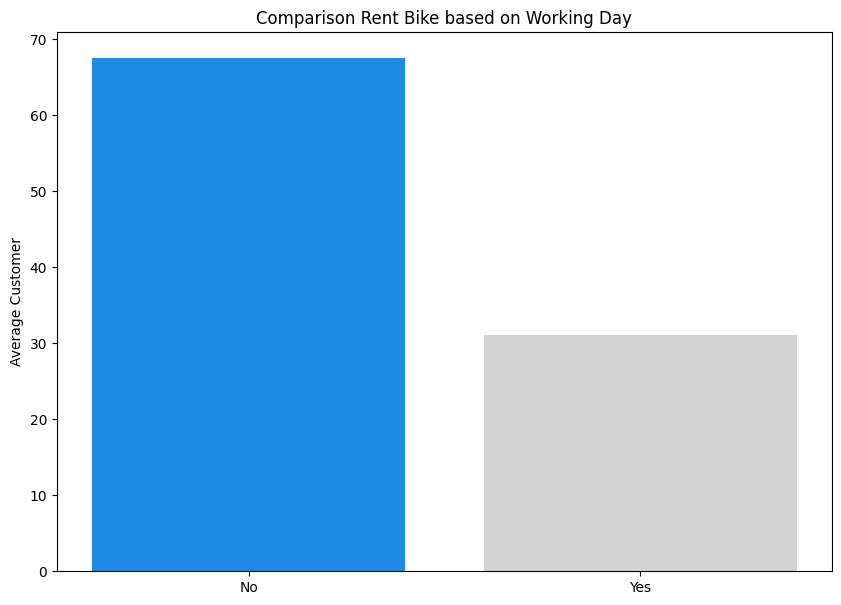

In [46]:
plt.figure(figsize=(10, 7))

colors = ['#1E88E5', '#D3D3D3']

plt.bar(
    df_workingday_2012['workingday'],
    df_workingday_2012['avg_customer_casual'],
    color=colors
)

plt.ylabel('Average Customer')
plt.title('Comparison Rent Bike based on Working Day')
plt.show()

In [47]:
workingday_2012 = df_2012[df_2012['workingday'] == 'Yes']['casual']
offwork_2012 = df_2012[df_2012['workingday'] == 'No']['casual']

t_stat, p_val = stats.ttest_ind(workingday_2012, offwork_2012)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

T-statistic: -29.2267
P-value: 0.0000


**Insight:**
- untuk melakukan konversi customer casual menjadi subcription, kita bisa manfaatkan waktu libur kerja. karena jika dilihat peningkatan customer signifikan di 2012

## Analisis Lanjutan (Opsional)

### Correlation data

In [48]:
df_copy.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual,registered,count_customer,date_month
0,2011-01-01,Spring,2011,1,0,No,Saturday,No,Clear,3.28,3.0014,81.0,0.0,3,13,16,2011-01
1,2011-01-01,Spring,2011,1,1,No,Saturday,No,Clear,2.34,1.9982,80.0,0.0,8,32,40,2011-01
2,2011-01-01,Spring,2011,1,2,No,Saturday,No,Clear,2.34,1.9982,80.0,0.0,5,27,32,2011-01
3,2011-01-01,Spring,2011,1,3,No,Saturday,No,Clear,3.28,3.0014,75.0,0.0,3,10,13,2011-01
4,2011-01-01,Spring,2011,1,4,No,Saturday,No,Clear,3.28,3.0014,75.0,0.0,0,1,1,2011-01


In [49]:
# make copy
df_correlation = df_copy[['date_day', 'season', 'holiday', 'workingday', 'weathersit', 
                          'temperature', 'feeling_temperature', 'humidity', 'windspeed',
                          'count_customer']].copy()

membuat data copy untuk mencari korelasi antar variabel untuk melakukan forecasting customer

In [50]:
df_correlation_bydateday = df_correlation.groupby(['date_day', 'season', 'holiday', 'workingday', 'weathersit']).agg(
    temperature=('temperature', 'mean'),
    feeling_temperature=('feeling_temperature', 'mean'),
    humidity=('humidity', 'mean'),
    windspeed=('windspeed', 'mean'),
    total_customer=('count_customer', 'sum')
).reset_index()

melakukan groupby untuk mencari korelasi antar variabel

In [51]:
df_correlation_bydateday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_day             1570 non-null   datetime64[ns]
 1   season               1570 non-null   object        
 2   holiday              1570 non-null   object        
 3   workingday           1570 non-null   object        
 4   weathersit           1570 non-null   object        
 5   temperature          1570 non-null   float64       
 6   feeling_temperature  1570 non-null   float64       
 7   humidity             1570 non-null   float64       
 8   windspeed            1570 non-null   float64       
 9   total_customer       1570 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 122.8+ KB


In [52]:
df_correlation_bydateday

,date_day,season,holiday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,total_customer
0,2011-01-01,Spring,No,No,Clear,4.925000,4.499600,78.500000,4.583358,305
1,2011-01-01,Spring,No,No,Light Rain/Snow,11.740000,11.997200,88.000000,16.997900,72
2,2011-01-01,Spring,No,No,Mist,11.364000,11.399240,81.600000,16.900080,608
3,2011-01-02,Spring,No,No,Clear,5.160000,1.166600,45.500000,20.000617,165
4,2011-01-02,Spring,No,No,Light Rain/Snow,9.484000,8.398880,75.200000,14.000320,219
...,...,...,...,...,...,...,...,...,...,...
1565,2012-12-29,Spring,No,No,Mist,4.054118,-0.001600,71.117647,9.294476,748
1566,2012-12-30,Spring,No,No,Clear,4.043750,-0.687175,45.750000,24.688244,1551
1567,2012-12-30,Spring,No,No,Mist,3.985000,-0.749050,53.500000,21.125100,245
1568,2012-12-31,Spring,No,Yes,Clear,0.695000,-3.166850,61.583333,10.166133,598


In [53]:
df_correlation_bydateday.set_index('date_day', inplace=True)

In [54]:
df_correlation_bydateday['weathersit'].unique()

array(['Clear', 'Light Rain/Snow', 'Mist', 'Extreme Weather'],
      dtype=object)

In [55]:
weathersit_encoded = {
    'Clear' : 1,
    'Mist' : 2,
    'Light Rain/Snow' : 3,
    'Extreme Weather' : 4
}

df_correlation_bydateday['weathersit_encoded'] = df_correlation_bydateday['weathersit'].map(weathersit_encoded)

melakukan Ordinal Encoding dengan menggunakan mapping untuk data weather

In [56]:
columns_to_encode = ['workingday', 'holiday', 'season']

df_correlation_bydateday = pd.get_dummies(df_correlation_bydateday, columns=columns_to_encode, dtype=int)

df_correlation_bydateday

,weathersit,temperature,feeling_temperature,humidity,windspeed,total_customer,weathersit_encoded,workingday_No,workingday_Yes,holiday_No,holiday_Yes,season_Fall,season_Spring,season_Summer,season_Winter
date_day,,,,,,,,,,,,,,,
2011-01-01,Clear,4.925000,4.499600,78.500000,4.583358,305,1,1,0,1,0,0,1,0,0
2011-01-01,Light Rain/Snow,11.740000,11.997200,88.000000,16.997900,72,3,1,0,1,0,0,1,0,0
2011-01-01,Mist,11.364000,11.399240,81.600000,16.900080,608,2,1,0,1,0,0,1,0,0
2011-01-02,Clear,5.160000,1.166600,45.500000,20.000617,165,1,1,0,1,0,0,1,0,0
2011-01-02,Light Rain/Snow,9.484000,8.398880,75.200000,14.000320,219,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-29,Mist,4.054118,-0.001600,71.117647,9.294476,748,2,1,0,1,0,0,1,0,0
2012-12-30,Clear,4.043750,-0.687175,45.750000,24.688244,1551,1,1,0,1,0,0,1,0,0
2012-12-30,Mist,3.985000,-0.749050,53.500000,21.125100,245,2,1,0,1,0,0,1,0,0


melakukan encoding untuk data workingday, holiday, dan season menggunakan One Hot Encoding

### Pertanyaan 1: - Faktor apa yang memepengaruhi customer menyewa sepeda? 

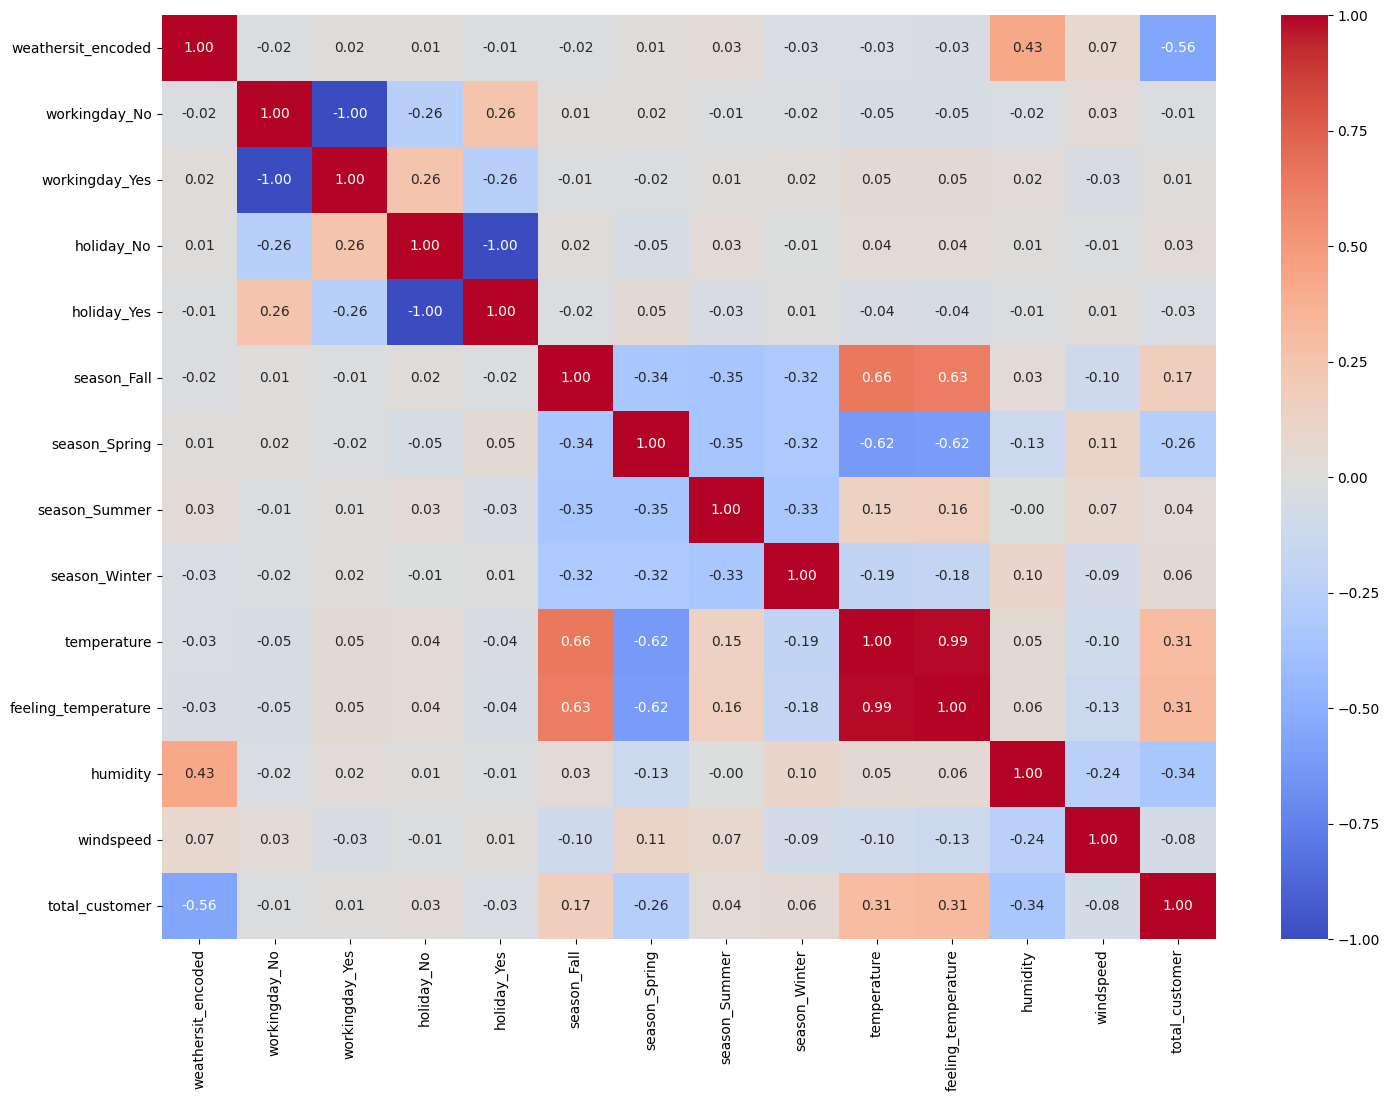

In [57]:
specific_columns = ['weathersit_encoded', 'workingday_No', 'workingday_Yes', 'holiday_No',
                    'holiday_Yes', 'season_Fall', 'season_Spring', 'season_Summer',
                    'season_Winter', 'temperature', 'feeling_temperature',
                    'humidity', 'windspeed', 'total_customer']

df_corr = df_correlation_bydateday[specific_columns].corr()

plt.figure(figsize=(17, 12))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

**Insight:**
- secara keseluruhan yang mempengaruhi customer menyewa sepeda adalah cuaca, temperature, dan humidity, karena memiliki korelasi yang cukup kuat dengan total_customer dan korelasi antar variabel lain fitur lain seperti (humidity dengan temperature, cuaca dan humidity) tidak tinggi.
- kita akan gunakan fitur tersebut untuk membuat model forecasting

In [58]:
num_col = df_correlation_bydateday[['temperature', 'humidity']].copy()
num_col.head()

,temperature,humidity
date_day,,
2011-01-01,4.925,78.5
2011-01-01,11.740,88.0
2011-01-01,11.364,81.6
2011-01-02,5.160,45.5
2011-01-02,9.484,75.2


In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_col_encoded = pd.DataFrame(
    scaler.fit_transform(num_col),
    columns=['temperature_encoded', 'humidity_encoded'],
    index=num_col.index
)

Melakukan normalisasi dengan MinMaxScaler agar bobot antar data sama saat melakukan forecasting

In [63]:
df_forecast = pd.concat([df_correlation_bydateday[['weathersit_encoded', 'total_customer']], num_col_encoded], axis=1)
df_forecast.sort_index(ascending=True, inplace=True)
df_forecast

,weathersit_encoded,total_customer,temperature_encoded,humidity_encoded
date_day,,,,
2011-01-01,1,305,0.261275,0.785000
2011-01-01,3,72,0.417647,0.880000
2011-01-01,2,608,0.409020,0.816000
2011-01-02,1,165,0.266667,0.455000
2011-01-02,3,219,0.365882,0.752000
...,...,...,...,...
2012-12-29,2,748,0.241292,0.711176
2012-12-30,1,1551,0.241054,0.457500
2012-12-30,2,245,0.239706,0.535000


menggabungkan data df_correlation_bydateday (dengan nilai cuaca dan total customer) dengan data hasil normalisasi MinMaxScaler (temperature dan humidity)

### Import Library Forecasting (SARIMAX)

In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

melakukan Import Library SARIMAX. algortima ini dipilih karena dapat menangkap trends seasonal dan faktor eksternal (cuaca, temperature, dan humidity) dengan baik.

In [65]:
n = len(df_forecast)

train_size = int(n * 0.9)

train_df = df_forecast.iloc[:train_size]
test_df = df_forecast.iloc[train_size:]

print('train_size:', len(train_df))
print('test_size:', len(test_df))

train_size: 1413
test_size: 157


memisahkan data train dan test, didapatkan sebanyak 1413 data untuk train model, dan 157 untuk melakukan evaluasi model SARIMAX

In [66]:
exog_vars_train = train_df[['temperature_encoded', 'humidity_encoded', 'weathersit_encoded']]
y_train = train_df['total_customer']

In [67]:
exog_vars_test = test_df[['temperature_encoded', 'humidity_encoded', 'weathersit_encoded']]
y_test = test_df['total_customer']

membagi faktor eksternal dengan target 

In [68]:
model = SARIMAX(y_train,
                exog=exog_vars_train,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 7))

results = model.fit()
print(results.summary())

c:\Users\wawan\Dev\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\wawan\Dev\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                    total_customer   No. Observations:                 1413
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -12242.913
Date:                           Sun, 01 Feb 2026   AIC                          24501.826
Time:                                   17:25:08   BIC                          24543.808
Sample:                                        0   HQIC                         24517.517
                                          - 1413                                         
Covariance Type:                             opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
temperature_encoded  4985.0958    447.107     11.150      0.000    4108.783    5861.409
humidity_encoded

Melakukan Training model SARIMAX

**Insight:**
- model SARIMAX memprediksi mingguan dengan baik, dengan Prob(Q) sebesar 0.89. faktor eksternal juga mempengaruhi kinerja model ditandai dengan P_value kurang dari 5% 
- faktor eksternal temperature mempengaruhi customer menyewa sepeda. 1 derajat C temperature meningkat akan menambahkan customer sebesar 4985 orang. dengan error prediksi faktor ini sekitar 447
- faktor eksternal humidity, menunjukkan 1 persen humidity meningkat customer akan berkurang sebesar 2900 orang. dengan error prediksi faktor ini sekitar 258
- faktor eksternal cuaca merupakan data ordinal, menunjukkan semakin meningkatnya cuaca akan mengurangi customer yang menyewa sepeda sekitar 1177. dengan error prediksi sebesar 58

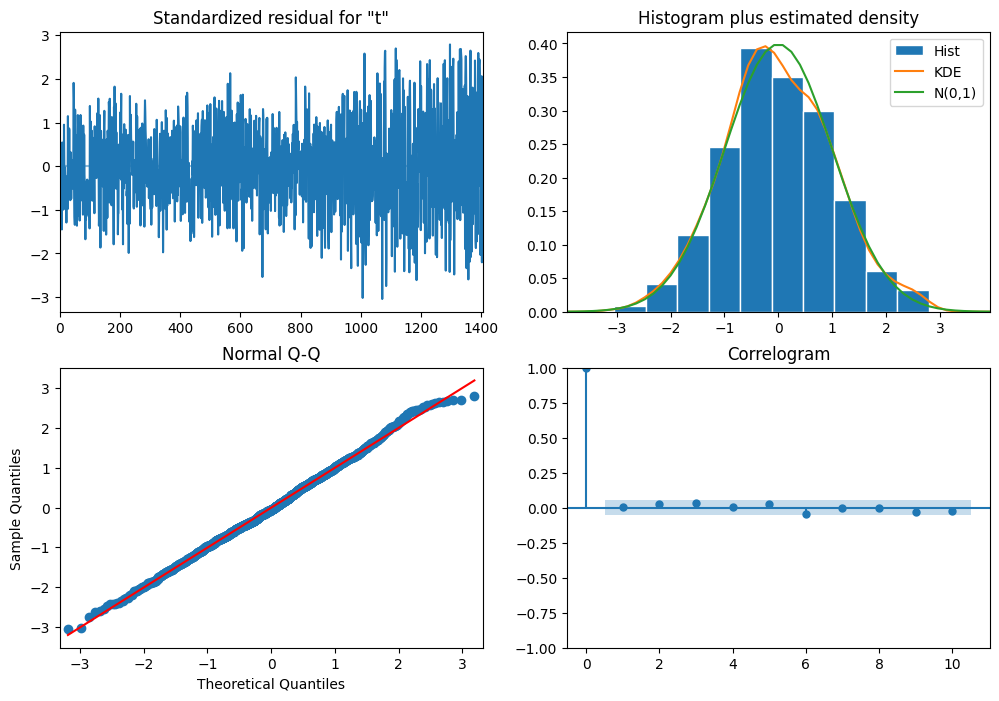

In [69]:
results.plot_diagnostics(figsize=(12, 8))
plt.show()

**insight:**
- grafik Normal Q-Q menunjukkan garis dan scatter hampir sesuai. menunjukkan model SARIMAX sudah cukup baik.
- Correlogram tidak menunjukkan error di luar arsiran, yang berarti model dapat menangkap data dengan baik

In [70]:
model_fit = model.fit(disp=False)
forecast = model_fit.get_forecast(steps=len(test_df), exog=exog_vars_test)
y_pred = forecast.predicted_mean

c:\Users\wawan\Dev\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\wawan\Dev\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}%")

MAE: 1470.8610329410863
MSE: 3049848.528122473
RMSE: 1746.3815528464772%


**Insight Model:**
- secara rata - rata model SARIMAX ini meleset sekitar 1471 unit dari nilai aslinya. jadi jika kita prediksi customer 3400, kenyataannya mungkin 1929 atau 4871.
- RMSE lebih tinggi dari pada MAE menandakan model SARIMAX, kadang - kadang melakukan kesalahan prediksi di hari tertentu 

c:\Users\wawan\Dev\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\wawan\Dev\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Hasil Prediksi 6 Hari ke Depan:
1413    5621.281997
1414    3719.241652
1415    1299.684601
1416    3089.166527
1417     183.720917
1418    4584.332614
Name: mean, dtype: float64


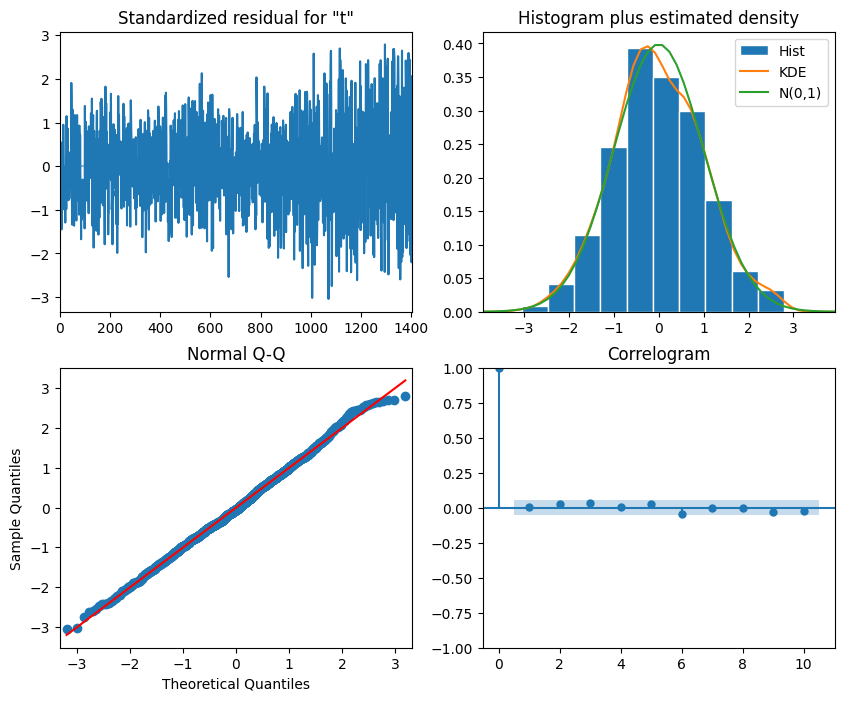

In [72]:
exog_forecast = pd.DataFrame({'temperature_encoded': [0.6, 0.54, 0.45, 0.21, 0.56, 1],
                              'humidity_encoded': [0.36, 0.5, 0.76, 0.5, 1, 0.57],
                              'weather_encoded': [1, 2, 3, 1, 4, 3]})
forecast = results.get_forecast(steps=6, exog=exog_forecast)
print("Hasil Prediksi 6 Hari ke Depan:")
print(forecast.summary_frame()['mean'])

results.plot_diagnostics(figsize=(10, 8))
plt.show()

melakukan test dengan data random, untuk melihat hasil prediksi model SARIMAX

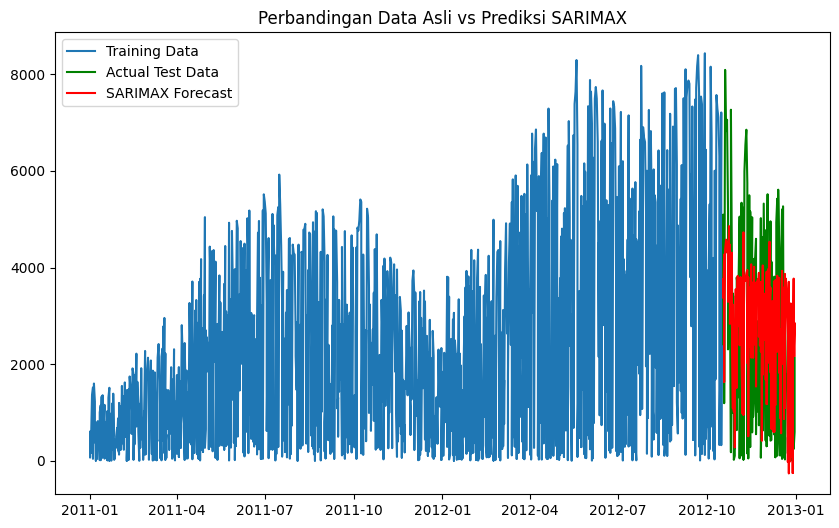

In [73]:
plt.figure(figsize=(10,6))
plt.plot(y_train.index, y_train, label='Training Data')
plt.plot(y_test.index, y_test, label='Actual Test Data', color='green')
plt.plot(y_test.index, y_pred, label='SARIMAX Forecast', color='red')
plt.title('Perbandingan Data Asli vs Prediksi SARIMAX')
plt.legend()
plt.show()

model memprediksi data terbaru dengan cukup baik

## Convert data to CSV

In [ ]:
df_copy.to_csv('dashboard/rent_bike.csv', index=False)

## Conclusion

- Conclution pertanyaan 1 : Faktor apa yang memepengaruhi customer menyewa sepeda? 
customer menyewa sepeda **dipengaruhi** oleh **3 faktor, yaitu cuaca, temperatur, dan humidity**. semakin extreme cuacanya customer akan mengalami penurunan, semakin tinggi temperaturnya customer semakin banyak yang menyewa sepeda, dan semakin tinggi humidity customer semakin menurun.

- Conclution pertanyaan 2 : Pada jam berapa terjadi permintaan sewa sepeda tertinggi?
**jam sibuk berada di jam 8 dan jam 17 - 18**. dari pola ini menandakan customer kita didominasi oleh **pekerja.**

- Conclusion pertanyaan 3 : Kapan waktu spesifik untuk konversi customer casual menjadi registered?
Waktu spesifik untuk konversi customer **casual** menjadi subcription adalah **waktu libur kerja**. dimana terjadi lonjakan sewa sepeda customer casual pada hari tersebut.

- Conclusion pertanyaan 4 : Kapan waktu yang tepat untuk melakukan maintenance harian sepeda?
Waktu yang cocok untuk **maintenance harian** pada **jam 0 - 5**, karena pada jam tersebut terjadi penurunan sewa sepeda.

## Recommendation
General:
- maintenance rutin pada saat musim semi. agar seluruh sepeda dalam kondisi prima saat lonjakan sewa sepeda di maret atau peralihan ke musim panas.

- maintenance harian di jam 0 - 5 pagi, untuk memastikan sepeda bisa digunakan pada saat jam berangkat kerja.


Customer Loyal (Registered)
- Tawarkan program langganan tahunan untuk mengunci loyalitas mereka pada saat musim semi.

Customer Casual
- terapkan dynamic price dengan meningkatkan harga di hari Sabtu dan Minggu atau saat cuaca cerah untuk memaksimalkan margin.

- tawarkan program loyal 2 hari atau mingguan dengan harga diskon saat harga naik di Sabtu dan Minggu.

- tawarkan paket bundling => "Waktu Liburan!!" untuk keluarga atau grup.